![](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F3335785%2F219228e436b0e694f835f70194e45c8c%2Fmaxresdefault.jpg?generation=1589357922679234&alt=media)

<font size='5' color='blue' align = 'center'>Table of Contents</font> 
<font size='3' color='purple'>
1. [Introduction](#1)
    
1. [**Ensemble Techniques**](#2)
    
    2.1 [**Max Voting / Voting Classifier**](#21)
    
    2.2 [**Averaging**](#22)
    
    2.3 [**Weighted Averaging**](#23)
    
    2.4 [**Stacking**](#24)
    
    2.5 [**Blending**](#25)
    
    2.6 [**Bagging**](#26)
    
    2.7 [**Boosting**](#27)
 
1. [References](#3)  

1. [Conclusion](#4)  

    
# 1. Introduction <a id="1"></a> <br>
    
Misalkan Anda ingin membeli mobil. Sekarang dengan mengunjungi perusahaan mobil pertama dan berdasarkan saran dealer apakah kita akan langsung melakukan pembelian mobil? Jawabannya pasti TIDAK besar kan?
    
![](https://thumbs.dreamstime.com/b/car-sale-4167169.jpg)
    
Jadi yang kita lakukan adalah memutuskan dulu mobil mana yang akan dibeli, apakah itu mobil baru atau bekas, jenis mobil, model dan tahun pembuatannya, mencari daftar dealer, mencari diskon/penawaran, ulasan pelanggan, pendapat dari teman dan keluarga, kinerja, efisiensi bahan bakar dan jelas setiap pembeli mobil akan untuk kisaran harga terbaik dll.
    
![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSC0-mqf3xqr3MESGW-mGwaWQkkBjwJGbNFsQ&usqp=CAU)
    
Singkatnya, Anda tidak akan langsung mencapai kesimpulan, tetapi akan membuat keputusan dengan mempertimbangkan semua faktor yang disebutkan di atas sebelum kami memutuskan pilihan terbaik.
    
**Ensemble models** in machine learning operate on a similar idea.
![](https://i.pinimg.com/474x/d7/c7/9b/d7c79b0c7abc5a34e17710fe596f6834.jpg)    
Ensemble Learning membantu meningkatkan hasil pembelajaran mesin dengan menggabungkan beberapa model untuk meningkatkan kinerja prediktif dibandingkan dengan satu model.
![](https://i.imgur.com/L2Jaqm8.png)
    
# 2. Ensemble Techniques <a id="2"></a> <br>

## 2.1 Max Voting / Voting Classifier <a id="2.1"></a> <br>

Metode **max voting** umumnya digunakan untuk masalah klasifikasi. Dalam teknik ini, beberapa model digunakan untuk membuat prediksi untuk setiap titik data. Prediksi oleh masing-masing model dianggap sebagai 'vote'. Prediksi yang kami dapatkan dari sebagian besar model digunakan sebagai prediksi akhir.

**Voting Classifier** adalah model pembelajaran mesin yang melatih ensemble dari banyak model dan memprediksi output (kelas) berdasarkan probabilitas tertinggi dari kelas yang dipilih sebagai output.
Ini hanya mengumpulkan temuan dari setiap pengklasifikasi yang diteruskan ke Pengklasifikasi Pemungutan Suara dan memprediksi kelas keluaran berdasarkan mayoritas suara terbanyak. Idenya adalah alih-alih membuat model khusus yang terpisah dan menemukan akurasi untuk masing-masing model, kami membuat model tunggal yang dilatih oleh model ini dan memprediksi keluaran berdasarkan mayoritas gabungan suara untuk setiap kelas keluaran.

Sekarang mari kita gunakan dataset IRIS untuk mendemonstrasikan Pengklasifikasi Voting

In [7]:
# importing libraries 
from sklearn.ensemble import VotingClassifier ,BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score 
from numpy import mean,std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold,train_test_split
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
from sklearn.datasets import load_wine,load_iris
from matplotlib.pyplot import figure
figure(num=2, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
import xgboost as xgb
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.linear_model import LinearRegression,BayesianRidge,ElasticNet,Lasso,SGDRegressor,Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,RobustScaler,StandardScaler
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA,KernelPCA
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor,RandomForestRegressor,VotingClassifier
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV,RandomizedSearchCV,StratifiedKFold,train_test_split
from sklearn.base import BaseEstimator,clone,TransformerMixin,RegressorMixin
from sklearn.svm import LinearSVR,SVR
#import xgboost 
from xgboost import XGBRegressor
#Import Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew
from scipy.stats.stats import pearsonr
%matplotlib inline
seed = 1075
np.random.seed(seed)

In [8]:
# loading iris dataset 
iris = load_iris() 
X = iris.data[:, :4] 
Y = iris.target 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.20,random_state = 42) 

In [10]:
# Ensemble of Models 
estimator = [] 
estimator.append(('LR',LogisticRegression(solver ='lbfgs',multi_class ='multinomial',max_iter = 200))) 
estimator.append(('SVC', SVC(gamma ='auto', probability = True))) 
estimator.append(('DTC', DecisionTreeClassifier())) 

**Voting Classifier** mendukung dua jenis voting.

**Hard Voting:** Dalam hard voting, kelas keluaran yang diprediksi adalah kelas dengan suara terbanyak, yaitu kelas yang memiliki probabilitas tertinggi untuk diprediksi oleh masing-masing pengklasifikasi. Misalkan tiga pengklasifikasi memprediksi kelas output (A, A, B), jadi di sini mayoritas memprediksi A sebagai output. Oleh karena itu A akan menjadi prediksi akhir.

![](https://image.slidesharecdn.com/7-180514114334/95/ensemble-learning-and-random-forests-12-638.jpg?cb=1527755412)

In [11]:
# Voting Classifier with hard voting 
hard_voting = VotingClassifier(estimators = estimator, voting ='hard') 
hard_voting.fit(X_train, y_train) 
y_pred = hard_voting.predict(X_test)   

In [12]:
# accuracy_score metric to predict Accuracy 
score = accuracy_score(y_test, y_pred) 
print("Hard Voting Score % d" % score) 

Hard Voting Score  1


**Soft Voting:** Dalam soft voting, kelas keluaran adalah prediksi berdasarkan rata-rata probabilitas yang diberikan pada kelas tersebut. Misalkan diberikan beberapa masukan untuk tiga model, probabilitas prediksi untuk kelas A = (0,30, 0,47, 0,53) dan B = (0,20, 0,32, 0,40). Jadi rata-rata untuk kelas A adalah 0,4333 dan B adalah 0,3067, pemenangnya jelas kelas A karena memiliki probabilitas tertinggi yang dirata-ratakan oleh masing-masing pengklasifikasi.

In [13]:
# Voting Classifier with soft voting 
soft_voting = VotingClassifier(estimators = estimator, voting ='soft') 
soft_voting.fit(X_train, y_train) 
y_pred = soft_voting.predict(X_test) 

In [14]:
# Using accuracy_score 
score = accuracy_score(y_test, y_pred) 
print("Soft Voting Score % d" % score) 

Soft Voting Score  1


Dalam praktiknya, akurasi output akan lebih untuk soft voting karena ini adalah probabilitas rata-rata dari semua estimator yang digabungkan, karena untuk dataset iris dasar kami, kami sudah overfitting, jadi tidak akan ada banyak perbedaan dalam output.

## 2.2 Averaging <a id="2.2"></a> <br>

Beberapa prediksi dibuat untuk setiap titik data dalam rata-rata. Dalam metode ini, kami mengambil rata-rata prediksi dari semua model dan menggunakannya untuk membuat prediksi akhir. Rata-rata dapat digunakan untuk membuat prediksi dalam masalah regresi atau saat menghitung probabilitas untuk masalah klasifikasi.

Cara paling sederhana untuk mengembangkan model averaging ensemble di Keras adalah dengan melatih beberapa model pada dataset yang sama kemudian menggabungkan prediksi dari masing-masing model yang dilatih.

Kami akan menggunakan masalah klasifikasi multi-kelas kecil sebagai dasar untuk mendemonstrasikan ansambel rata-rata model.

Kelas scikit-learn menyediakan fungsi make_blobs() yang dapat digunakan untuk membuat masalah klasifikasi multi-kelas dengan jumlah sampel yang ditentukan, variabel input, kelas, dan varians sampel di dalam kelas.

Kami menggunakan masalah ini dengan 500 contoh, dengan variabel input untuk mewakili koordinat x dan y dari titik dan standar deviasi 2,0 untuk titik dalam setiap grup. Kami akan menggunakan status acak yang sama untuk memastikan bahwa kami selalu mendapatkan 500 poin yang sama.

In [15]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame

In [16]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=2, random_state=2)

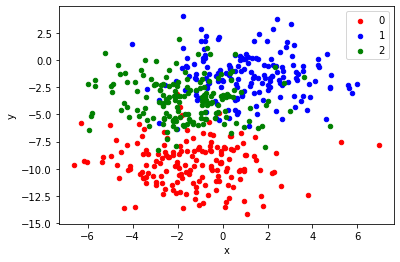

In [17]:
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

Kita dapat melihat bahwa standar deviasi 2.0 berarti bahwa kelas-kelas tidak dapat dipisahkan secara linier (dipisahkan oleh garis) menyebabkan banyak titik ambigu.

**Jadi, secara ringkas untuk setiap contoh kumpulan data pengujian, prediksi rata-rata dihitung. Metode ini sering kali mengurangi overfit dan menciptakan model regresi yang lebih halus.**

## 2.3 Weighted Averaging <a id="2.3"></a> <br>
Ini adalah perpanjangan dari metode rata-rata. Semua model diberi bobot berbeda yang menentukan pentingnya setiap model untuk prediksi.

![](https://www.analyticsvidhya.com/wp-content/uploads/2015/08/Screen-Shot-2015-08-22-at-6.40.37-pm.png)

Untuk ini kami akan menggunakan dataset harga perumahan untuk menunjukkan seperti yang ditunjukkan di bawah ini

Pertama-tama impor perpustakaan & data

In [20]:
train = pd.read_csv('dataset/house-prices-advanced-regression-techniques/train.csv',na_values = '#NAME?')
test = pd.read_csv('dataset/house-prices-advanced-regression-techniques/test.csv',na_values = '#NAME?')

Berdasarkan distribusi data, mari kita hapus beberapa outlier

In [21]:
train.drop(train[(train['GrLivArea'] >4000) & (train['SalePrice']<300000)].index,inplace = True)

Mari kita gabungkan set data pelatihan dan pengujian ke dalam kerangka data tunggal untuk kemudahan pembersihan data dan rekayasa fitur. Fitur 'Id' tidak memiliki arti penting bagi pemodelan kita karena merupakan variabel kontinu, jadi hapus fitur ini pada set data latih dan uji.

In [22]:
full = pd.concat([train,test],ignore_index=True)
full.drop('Id',axis = 1,inplace = True)
full.shape

(2917, 80)

Sekarang mari kita praproses data dengan melakukan beberapa perlakuan nilai yang hilang

In [23]:
missing_values = full.isnull().sum()
missing_values[missing_values>0].sort_values(ascending = False)

PoolQC          2908
MiscFeature     2812
Alley           2719
Fence           2346
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
KitchenQual        1
TotalBsmtSF        1
BsmtUnfSF          1
GarageCars         1
GarageArea         1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
Electrical         1
dtype: int64

mari kita hitung nilai yang hilang dari LotFrontage berdasarkan median LotArea dan Neighborhood. Untuk mencapai ini, mari kita kelompokkan Neighborhood dan LotFrontage terlebih dahulu sehubungan dengan median, mean dan count.

In [24]:
full.groupby(['Neighborhood'])[['LotFrontage']].agg(['mean','median','count'])

LotFrontage             
                    mean median count
Neighborhood                         
Blmngtn        46.900000   43.0    20
Blueste        27.300000   24.0    10
BrDale         21.500000   21.0    30
BrkSide        55.789474   51.0    95
ClearCr        88.150000   80.5    20
CollgCr        71.336364   70.0   220
Crawfor        69.951807   70.0    83
Edwards        65.153409   64.5   176
Gilbert        74.207207   64.0   111
IDOTRR         62.241379   60.0    87
MeadowV        25.606061   21.0    33
Mitchel        75.144444   74.0    90
NAmes          75.210667   73.0   375
NPkVill        28.142857   24.0    21
NWAmes         81.517647   80.0    85
NoRidge        91.629630   89.0    54
NridgHt        84.184049   92.0   163
OldTown        61.777293   60.0   229
SWISU          59.068182   60.0    44
Sawyer         74.551020   72.0    98
SawyerW        70.669811   67.0   106
Somerst        64.549383   72.5   162
StoneBr        62.173913   60.0    46
Timber         81.157895   82.0    57
Veenker        72.000000   80.0    16

LotArea adalah fitur berkelanjutan jadi yang terbaik adalah menggunakan metode qcut panda untuk membaginya menjadi 10 bagian.

In [25]:
full['LotAreaCut'] = pd.qcut(full.LotArea,10)

full.groupby([full['LotAreaCut']])[['LotFrontage']].agg(['mean','median','count'])

LotFrontage             
                           mean median count
LotAreaCut                                  
(1299.999, 4921.8]    35.741036   34.0   251
(4921.8, 7007.2]      55.460674   52.0   267
(7007.2, 7949.0]      62.959839   62.0   249
(7949.0, 8740.4]      67.113725   65.0   255
(8740.4, 9452.0]      69.959184   70.0   245
(9452.0, 10148.8]     73.988235   75.0   255
(10148.8, 11000.0]    73.636364   75.0   253
(11000.0, 12196.8]    83.371681   82.0   226
(12196.8, 14285.8]    84.973684   85.0   228
(14285.8, 215245.0]   92.846535   90.0   202

Jadi mari kita hitung nilai yang hilang dari LotFrontage seperti yang dinyatakan di atas dengan median LotArea dan Neighborhood.

In [26]:
full['LotFrontage']= full.groupby(['LotAreaCut','Neighborhood'])['LotFrontage'].transform(lambda x : x.fillna(x.median()))
full['LotFrontage']= full.groupby(['LotAreaCut'])['LotFrontage'].transform(lambda x : x.fillna(x.median()))

Sekarang mari kita periksa kembali nilai yang hilang untuk melihat nilai yang hilang dari LotFrontage berhasil diperhitungkan.

In [27]:
missing_values = full.isnull().sum()

missing_values[missing_values>0].sort_values(ascending = False)

PoolQC          2908
MiscFeature     2812
Alley           2719
Fence           2346
SalePrice       1459
FireplaceQu     1420
GarageCond       159
GarageQual       159
GarageFinish     159
GarageYrBlt      159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
BsmtHalfBath       2
Utilities          2
BsmtFullBath       2
KitchenQual        1
Electrical         1
TotalBsmtSF        1
BsmtUnfSF          1
GarageCars         1
GarageArea         1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64

Sekarang mari kita fokus pada fitur numerik dengan satu nilai yang hilang dan menggantinya dengan 0

In [28]:
columns = ["MasVnrArea", "BsmtUnfSF", "TotalBsmtSF", "GarageCars", "BsmtFinSF2", "BsmtFinSF1", "GarageArea"]
for col in columns:full[col].fillna(0,inplace= True)

Sekarang mari kita fokus pada beberapa fitur kategoris dengan jumlah nilai yang hilang dan menggantinya dengan 'Tidak Ada'

In [29]:
columns1 = ["PoolQC" , "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageQual", "GarageCond", "GarageFinish",
"GarageYrBlt", "GarageType", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1", "MasVnrType"]
for col1 in columns1:full[col1].fillna('None',inplace = True)

Sekarang mari kita fokus pada beberapa fitur kategoris dengan lebih sedikit nilai yang hilang dan menggantinya dengan nilai yang paling sering muncul yang merupakan mode dari fitur tersebut.

In [30]:
columns2 = ["MSZoning", "BsmtFullBath", "BsmtHalfBath", "Utilities", "Functional",
            "Electrical", "KitchenQual", "SaleType","Exterior1st", "Exterior2nd"]

for col2 in columns2:
    full[col2].fillna(full[col2].mode()[0],inplace = True)

Sekarang mari kita periksa apakah kita memiliki nilai lain yang hilang yang perlu diperhitungkan kecuali Harga Jual untuk dataset uji yang merupakan variabel target yang akan ditentukan.

In [31]:
full.isnull().sum()[full.isnull().sum()>0]

SalePrice    1459
dtype: int64

In [32]:
numeric_features = full.select_dtypes(include=[np.number])
numeric_features.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [33]:
Numstr = ["MSSubClass","BsmtFullBath","BsmtHalfBath","HalfBath","BedroomAbvGr","KitchenAbvGr","MoSold",
          "YrSold","YearBuilt","YearRemodAdd","LowQualFinSF","GarageYrBlt"]

for i in Numstr:
    full[i]=full[i].astype(str)

In [34]:
full.groupby(['MSSubClass'])[['SalePrice']].agg(['mean','median','count'])

SalePrice                
                     mean    median count
MSSubClass                               
120         200779.080460  192000.0    87
150                   NaN       NaN     0
160         138647.380952  146000.0    63
180         102300.000000   88500.0    10
190         129613.333333  128250.0    30
20          185224.811567  159250.0   536
30           95829.724638   99900.0    69
40          156125.000000  142500.0     4
45          108591.666667  107500.0    12
50          143302.972222  132000.0   144
60          240403.542088  216000.0   297
70          166772.416667  156000.0    60
75          192437.500000  163500.0    16
80          169736.551724  166500.0    58
85          147810.000000  140750.0    20
90          133541.076923  135980.0    52

In [35]:
def map_values():
    full["oMSSubClass"] = full.MSSubClass.map({'180':1, 
                                        '30':2, '45':2, 
                                        '190':3, '50':3, '90':3, 
                                        '85':4, '40':4, '160':4, 
                                        '70':5, '20':5, '75':5, '80':5, '150':5,
                                        '120': 6, '60':6})
    
    full["oMSZoning"] = full.MSZoning.map({'C (all)':1, 'RH':2, 'RM':2, 'RL':3, 'FV':4})
    full["oNeighborhood"] = full.Neighborhood.map({'MeadowV':1,
                                               'IDOTRR':2, 'BrDale':2,
                                               'OldTown':3, 'Edwards':3, 'BrkSide':3,
                                               'Sawyer':4, 'Blueste':4, 'SWISU':4, 'NAmes':4,
                                               'NPkVill':5, 'Mitchel':5,
                                               'SawyerW':6, 'Gilbert':6, 'NWAmes':6,
                                               'Blmngtn':7, 'CollgCr':7, 'ClearCr':7, 'Crawfor':7,
                                               'Veenker':8, 'Somerst':8, 'Timber':8,
                                               'StoneBr':9,
                                               'NoRidge':10, 'NridgHt':10})
    
    full["oCondition1"] = full.Condition1.map({'Artery':1,
                                           'Feedr':2, 'RRAe':2,
                                           'Norm':3, 'RRAn':3,
                                           'PosN':4, 'RRNe':4,
                                           'PosA':5 ,'RRNn':5})
    
    full["oBldgType"] = full.BldgType.map({'2fmCon':1, 'Duplex':1, 'Twnhs':1, '1Fam':2, 'TwnhsE':2})
    
    full["oHouseStyle"] = full.HouseStyle.map({'1.5Unf':1, 
                                           '1.5Fin':2, '2.5Unf':2, 'SFoyer':2, 
                                           '1Story':3, 'SLvl':3,
                                           '2Story':4, '2.5Fin':4})
    
    full["oExterior1st"] = full.Exterior1st.map({'BrkComm':1,
                                             'AsphShn':2, 'CBlock':2, 'AsbShng':2,
                                             'WdShing':3, 'Wd Sdng':3, 'MetalSd':3, 'Stucco':3, 'HdBoard':3,
                                             'BrkFace':4, 'Plywood':4,
                                             'VinylSd':5,
                                             'CemntBd':6,
                                             'Stone':7, 'ImStucc':7})
    
    full["oMasVnrType"] = full.MasVnrType.map({'BrkCmn':1, 'None':1, 'BrkFace':2, 'Stone':3})
    
    full["oExterQual"] = full.ExterQual.map({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
    
    full["oFoundation"] = full.Foundation.map({'Slab':1, 
                                           'BrkTil':2, 'CBlock':2, 'Stone':2,
                                           'Wood':3, 'PConc':4})
    
    full["oBsmtQual"] = full.BsmtQual.map({'Fa':2, 'None':1, 'TA':3, 'Gd':4, 'Ex':5})
    
    full["oBsmtExposure"] = full.BsmtExposure.map({'None':1, 'No':2, 'Av':3, 'Mn':3, 'Gd':4})
    
    full["oHeating"] = full.Heating.map({'Floor':1, 'Grav':1, 'Wall':2, 'OthW':3, 'GasW':4, 'GasA':5})
    
    full["oHeatingQC"] = full.HeatingQC.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    
    full["oKitchenQual"] = full.KitchenQual.map({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
    
    full["oFunctional"] = full.Functional.map({'Maj2':1, 'Maj1':2, 'Min1':2, 'Min2':2, 'Mod':2, 'Sev':2, 'Typ':3})
    
    full["oFireplaceQu"] = full.FireplaceQu.map({'None':1, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    
    full["oGarageType"] = full.GarageType.map({'CarPort':1, 'None':1,
                                           'Detchd':2,
                                           '2Types':3, 'Basment':3,
                                           'Attchd':4, 'BuiltIn':5})
    
    full["oGarageFinish"] = full.GarageFinish.map({'None':1, 'Unf':2, 'RFn':3, 'Fin':4})
    
    full["oPavedDrive"] = full.PavedDrive.map({'N':1, 'P':2, 'Y':3})
    
    full["oSaleType"] = full.SaleType.map({'COD':1, 'ConLD':1, 'ConLI':1, 'ConLw':1, 'Oth':1, 'WD':1,
                                       'CWD':2, 'Con':3, 'New':3})
    
    full["oSaleCondition"] = full.SaleCondition.map({'AdjLand':1, 'Abnorml':2, 'Alloca':2, 'Family':2, 'Normal':3, 'Partial':4})            
                
                        
                        
    
    return "Done!"


In [36]:
map_values()

'Done!'

In [37]:
# drop two unwanted columns
full.drop("LotAreaCut",axis=1,inplace=True)

full.drop(['SalePrice'],axis=1,inplace=True)

In [38]:
full[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,2003,2003,2003.0
1,1976,1976,1976.0
2,2001,2002,2001.0
3,1915,1970,1998.0
4,2000,2000,2000.0


Let us create a class for the LabelEncoder to fit and transform some of the identified features

In [39]:
class labenc(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        label = LabelEncoder()
        X['YearBuilt']=label.fit_transform(X['YearBuilt'])
        X['YearRemodAdd']=label.fit_transform(X['YearRemodAdd'])
        X['GarageYrBlt']=label.fit_transform(X['GarageYrBlt'])
        return X
        

In [40]:
class skewness(BaseEstimator,TransformerMixin):
    def __init__(self,skew=0.5):
        self.skew = skew
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        X_numeric=X.select_dtypes(exclude=["object"])
        skewness = X_numeric.apply(lambda x: skew(x))
        skewness_features = skewness[abs(skewness) >= self.skew].index
        X[skewness_features] = np.log1p(X[skewness_features])
        return X

In [41]:
class dummies(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        X = pd.get_dummies(X)
        return X

Sekarang kita akan menggunakan pipeline untuk menghubungkan beberapa estimator menjadi satu. Ini berguna karena seringkali ada urutan langkah yang tetap dalam pemrosesan data, misalnya pemilihan fitur, normalisasi, dan klasifikasi. Pipeline melayani dua tujuan di sini:

Kenyamanan: Anda hanya perlu memanggil fit dan memprediksi sekali pada data Anda agar sesuai dengan seluruh urutan estimator.
Pemilihan parameter gabungan: Anda dapat menelusuri parameter semua estimator dalam pipeline sekaligus.
Semua estimator dalam pipa, kecuali yang terakhir, harus transformator (yaitu harus memiliki metode transformasi). Penaksir terakhir dapat berupa jenis apa pun (transformator, pengklasifikasi, dll.).

In [42]:
pipeline = Pipeline([('labenc',labenc()),('skewness',skewness(skew =1)),('dummies',dummies())])

In [43]:
full_copy = full.copy()
data_pipeline = pipeline.fit_transform(full_copy)

In [44]:
robust_scaler = RobustScaler()

In [45]:
n_train = train.shape[0]
n_train

1458

In [46]:
X= data_pipeline[:n_train]
y = train.SalePrice
test_X = data_pipeline[n_train:]
X.shape,y.shape,test_X.shape

((1458, 405), (1458,), (1459, 405))

In [47]:
X_scaled = robust_scaler.fit(X).transform(X)
y_log = np.log(train.SalePrice)
test_X_scaled = robust_scaler.transform(test_X)

In [48]:
X_scaled.shape,y_log.shape,test_X.shape

((1458, 405), (1458,), (1459, 405))

Now we will perform some feature selection like Lasso 

In [49]:
class add_feature(BaseEstimator, TransformerMixin):
    def __init__(self,additional=1):
        self.additional = additional
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        if self.additional==1:
            X["TotalHouse"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]   
            X["TotalArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"]
            
        else:
            X["TotalHouse"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]   
            X["TotalArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"]
            
            X["+_TotalHouse_OverallQual"] = X["TotalHouse"] * X["OverallQual"]
            X["+_GrLivArea_OverallQual"] = X["GrLivArea"] * X["OverallQual"]
            X["+_oMSZoning_TotalHouse"] = X["oMSZoning"] * X["TotalHouse"]
            X["+_oMSZoning_OverallQual"] = X["oMSZoning"] + X["OverallQual"]
            X["+_oMSZoning_YearBuilt"] = X["oMSZoning"] + X["YearBuilt"]
            X["+_oNeighborhood_TotalHouse"] = X["oNeighborhood"] * X["TotalHouse"]
            X["+_oNeighborhood_OverallQual"] = X["oNeighborhood"] + X["OverallQual"]
            X["+_oNeighborhood_YearBuilt"] = X["oNeighborhood"] + X["YearBuilt"]
            X["+_BsmtFinSF1_OverallQual"] = X["BsmtFinSF1"] * X["OverallQual"]
            
            X["-_oFunctional_TotalHouse"] = X["oFunctional"] * X["TotalHouse"]
            X["-_oFunctional_OverallQual"] = X["oFunctional"] + X["OverallQual"]
            X["-_LotArea_OverallQual"] = X["LotArea"] * X["OverallQual"]
            X["-_TotalHouse_LotArea"] = X["TotalHouse"] + X["LotArea"]
            X["-_oCondition1_TotalHouse"] = X["oCondition1"] * X["TotalHouse"]
            X["-_oCondition1_OverallQual"] = X["oCondition1"] + X["OverallQual"]
            
           
            X["Bsmt"] = X["BsmtFinSF1"] + X["BsmtFinSF2"] + X["BsmtUnfSF"]
            X["Rooms"] = X["FullBath"]+X["TotRmsAbvGrd"]
            X["PorchArea"] = X["OpenPorchSF"]+X["EnclosedPorch"]+X["3SsnPorch"]+X["ScreenPorch"]
            X["TotalPlace"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"] + X["OpenPorchSF"]+X["EnclosedPorch"]+X["3SsnPorch"]+X["ScreenPorch"]

    
            return X

In [50]:
pipeline = Pipeline([('labenc',labenc()),('add_feature', add_feature(additional=2)),
                     ('skewness',skewness(skew =1)),('dummies',dummies())])

full_pipe = pipeline.fit_transform(full)
full_pipe.shape

(2917, 426)

In [51]:
n_train=train.shape[0]
X = full_pipe[:n_train]
test_X = full_pipe[n_train:]
y= train.SalePrice

X_scaled = robust_scaler.fit(X).transform(X)
y_log = np.log(train.SalePrice)
test_X_scaled = robust_scaler.transform(test_X)

In [52]:
print(X_scaled.shape)

(1458, 426)


In [53]:
# Now let us define Root Mean Square Error 
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model,X,y,scoring="neg_mean_squared_error",cv=5))
    return rmse

We choose 4 models and use 5-folds cross-calidation to evaluate these models.

### Models include:

   - LinearRegression
   - Ridge
   - Lasso
   - Random Forest

In [54]:
models = [LinearRegression(),
             Ridge(),
             Lasso(alpha=0.01,max_iter=10000),
             RandomForestRegressor(),
             GradientBoostingRegressor(),
             SVR(),
             LinearSVR(),
             ElasticNet(alpha = 0.001,max_iter=10000),
             SGDRegressor(max_iter=1000, tol = 1e-3),
             BayesianRidge(),
             KernelRidge(alpha=0.6,kernel='polynomial',degree = 2,coef0=2.5),
             ExtraTreesRegressor(),
             XGBRegressor()
             ]

In [55]:
names = ['LR','Ridge','Lasso','RF','GBR','SVR','LSVR','ENet','SGDR','BayRidge','Kernel','XTreeR','XGBR']

In [56]:
for model,name in zip(models,names):
    score = rmse_cv(model,X_scaled,y_log)
    print("{}: {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR: 563380228.110560, 281367281.934851
Ridge: 0.117596, 0.009054
Lasso: 0.120932, 0.005813
RF: 0.131034, 0.007196
GBR: 0.121335, 0.004460
SVR: 0.131747, 0.010868
LSVR: 0.126264, 0.007887
ENet: 0.108729, 0.005422
SGDR: 0.300234, 0.011501
BayRidge: 0.110576, 0.005997
Kernel: 0.109421, 0.005545
XTreeR: 0.125309, 0.007176
XGBR: 0.129406, 0.007979


In [57]:
# To define the average weight 
class AverageWeight(BaseEstimator, RegressorMixin):
    def __init__(self,model,weight):
        self.model = model
        self.weight = weight
        
    def fit(self,X,y):
        self.models_ = [clone(x) for x in self.model]
        for model in self.models_:
            model.fit(X,y)
        return self
    
    def predict(self,X):
        w = list()
        pred = np.array([model.predict(X) for model in self.models_])
        # for every data point, single model prediction times weight, then add them together
        for data in range(pred.shape[1]):
            single = [pred[model,data]*weight for model,weight in zip(range(pred.shape[0]),self.weight)]
            w.append(np.sum(single))
        return w

In [58]:
lasso = Lasso(alpha= 0.0005, max_iter= 10000)
ridge = Ridge(alpha=45, max_iter= 10000)
svr = SVR(C = 0.2, epsilon= 0.025, gamma = 0.0004, kernel = 'rbf')
ker = KernelRidge(alpha=0.15 ,kernel='polynomial',degree=3 , coef0=0.9)
ela = ElasticNet(alpha=0.0065,l1_ratio=0.075,max_iter=10000)
bay = BayesianRidge()

#### Finally to calculate the average weights let us look at the following code

In [59]:
# Assign weights to all the above 6 models
w1 = 0.047
w2 = 0.2
w3 = 0.25
w4 = 0.3
w5 = 0.003
w6 = 0.2

weight_avg = AverageWeight(model = [lasso,ridge,svr,ker,ela,bay],weight=[w1,w2,w3,w4,w5,w6])
score = rmse_cv(weight_avg,X_scaled,y_log)
print(score.mean())

0.1092439889607516


If we consider only two models then the score will vary

In [60]:
weight_avg = AverageWeight(model = [svr,ker],weight=[0.50,0.50])
score = rmse_cv(weight_avg,X_scaled,y_log)
print(score.mean())

0.11166439558199041


Jadi secara ringkas, Rata-rata tertimbang adalah versi rata-rata sederhana yang sedikit dimodifikasi, di mana prediksi setiap model dikalikan dengan bobot dan kemudian rata-ratanya dihitung.

## 2.4 Stacking <a id="2.4"></a> <br>
![](https://d1m75rqqgidzqn.cloudfront.net/wp-data/2020/05/21160015/shutterstock_1159836664-696x464.jpg)
Stacking adalah teknik pembelajaran ensemble yang menggunakan prediksi dari beberapa model (misalnya pohon keputusan, knn atau svm) untuk membangun model baru. Model ini digunakan untuk membuat prediksi pada test set.

Stacking, juga dikenal sebagai Stacked Generalization adalah teknik ensemble yang menggabungkan beberapa klasifikasi atau model regresi melalui meta-classifier atau meta-regressor. Model tingkat dasar dilatih pada set pelatihan yang lengkap, kemudian model meta dilatih pada fitur yang merupakan keluaran dari model tingkat dasar. Tingkat dasar sering terdiri dari algoritma pembelajaran yang berbeda dan oleh karena itu susun ensembel sering kali heterogen. Berikut adalah diagram yang menggambarkan proses

Di bawah ini adalah penjelasan langkah demi langkah untuk ensemble bertumpuk sederhana:

![](https://www.researchgate.net/publication/324552457/figure/fig3/AS:616245728645121@1523935839872/An-example-scheme-of-stacking-ensemble-learning.png)

Step 1:The train set is split into 10 parts.
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/05/image-11-300x217.png)
Step 2:A base model (suppose a decision tree) is fitted on 9 parts and predictions are made for the 10th part. This is done for each part of the train set.
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/05/image-10-300x249.png)
Step 3:The base model (in this case, decision tree) is then fitted on the whole train dataset.

Step 4:Using this model, predictions are made on the test set.
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/05/image-2-300x225.png)
Step 5:Steps 2 to 4 are repeated for another base model (say knn) resulting in another set of predictions for the train set and test set.
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/05/image-3-300x224.png)
Step 6:The predictions from the train set are used as features to build a new model.
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/05/image12-292x300.png)

Step 7:This model is used to make final predictions on the test prediction set.


In order to simplify the above explanation, the stacking model we have created has only two levels. The decision tree and knn models are built at level zero, while a logistic regression model is built at level one. Feel free to create multiple levels in a stacking model.


In [ ]:
class stacking(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self,mod,meta_model):
        self.mod = mod
        self.meta_model = meta_model
        self.kf = KFold(n_splits=5, random_state=42, shuffle=True)
        
    def fit(self,X,y):
        self.saved_model = [list() for i in self.mod]
        oof_train = np.zeros((X.shape[0], len(self.mod)))
        
        for i,model in enumerate(self.mod):
            for train_index, val_index in self.kf.split(X,y):
                renew_model = clone(model)
                renew_model.fit(X[train_index], y[train_index])
                self.saved_model[i].append(renew_model)
                oof_train[val_index,i] = renew_model.predict(X[val_index])
        
        self.meta_model.fit(oof_train,y)
        return self
    
    def predict(self,X):
        whole_test = np.column_stack([np.column_stack(model.predict(X) for model in single_model).mean(axis=1) 
                                      for single_model in self.saved_model]) 
        return self.meta_model.predict(whole_test)
    
    def get_oof(self,X,y,test_X):
        oof = np.zeros((X.shape[0],len(self.mod)))
        test_single = np.zeros((test_X.shape[0],5))
        test_mean = np.zeros((test_X.shape[0],len(self.mod)))
        for i,model in enumerate(self.mod):
            for j, (train_index,val_index) in enumerate(self.kf.split(X,y)):
                clone_model = clone(model)
                clone_model.fit(X[train_index],y[train_index])
                oof[val_index,i] = clone_model.predict(X[val_index])
                test_single[:,j] = clone_model.predict(test_X)
            test_mean[:,i] = test_single.mean(axis=1)
        return oof, test_mean

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
X_scaled_imputed = SimpleImputer().fit_transform(X_scaled)
y_log_imputed = SimpleImputer().fit_transform(y_log.values.reshape(-1,1)).ravel()

In [ ]:
stack_model = stacking(mod=[lasso,ridge,svr,ker,ela,bay],meta_model=ker)

In [ ]:
score = rmse_cv(stack_model,X_scaled_imputed,y_log_imputed)

In [ ]:
print(score.mean())

0.10770838136721914


## 2.5 Blending <a id="2.5"></a> <br>

Blending follows the same approach as stacking but uses only a holdout (validation) set from the train set to make predictions. In other words, unlike stacking, the predictions are made on the holdout set only. The holdout set and the predictions are used to build a model which is run on the test set. Here is a detailed explanation of the blending process:

Step 1: The train set is split into training and validation sets
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/05/image-7-300x226.png)

Step 2: Model(s) are fitted on the training set.
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/05/image-5-300x228.png)

Step 3: The predictions are made on the validation set and the test set.

Step 4: The validation set and its predictions are used as features to build a new model.

Step 5: This model is used to make final predictions on the test and meta-features.


The difference between stacking and blending is that Stacking uses out-of-fold predictions for the train set of the next layer (i.e meta-model), and Blending uses a validation set (let’s say, 10-15% of the training set) to train the next layer.

We’ll build two models, decision tree and knn, on the train set in order to make predictions on the validation set.


In [ ]:
from sklearn.datasets import load_wine
# define dataset
X,y = load_wine().data,load_wine().target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=1)

In [ ]:
x_val=pd.DataFrame(X_val)
x_test=pd.DataFrame(X_test)

In [ ]:
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)
val_pred1=model1.predict(X_val)
test_pred1=model1.predict(X_test)
val_pred1=pd.DataFrame(val_pred1)
test_pred1=pd.DataFrame(test_pred1)

model2 = KNeighborsClassifier()
model2.fit(X_train,y_train)
val_pred2=model2.predict(X_val)
test_pred2=model2.predict(X_test)
val_pred2=pd.DataFrame(val_pred2)
test_pred2=pd.DataFrame(test_pred2)

Combining the meta-features and the validation set, a logistic regression model is built to make predictions on the test set.

In [ ]:
df_val=pd.concat([x_val, val_pred1,val_pred2],axis=1)
df_test=pd.concat([x_test, test_pred1,test_pred2],axis=1)

model = LogisticRegression()
model.fit(df_val,y_val)
model.score(df_test,y_test)

0.9166666666666666

## 2.6 Bagging <a id="2.6"></a> <br>
![](https://miro.medium.com/max/700/1*DFHUbdz6EyOuMYP4pDnFlw.jpeg)

**Bagging**, adalah singkatan dari kombinasi bootstrap dan agregasi. Bootstrapping adalah metode untuk membantu mengurangi varians dari classifier dan mengurangi overfitting, dengan melakukan resampling data dari training set dengan kardinalitas yang sama dengan set aslinya. Model yang dibuat harus kurang overfitted daripada model individu tunggal.

Varians yang tinggi untuk suatu model tidak baik, menunjukkan bahwa kinerjanya sensitif terhadap data pelatihan yang diberikan. Jadi, bahkan jika lebih banyak data pelatihan diberikan, model mungkin masih berkinerja buruk. Dan, bahkan mungkin tidak mengurangi varians model kami.

Bagging adalah metode yang efektif ketika Anda memiliki data yang terbatas, dan dengan menggunakan sampel, Anda bisa mendapatkan perkiraan dengan menggabungkan skor pada banyak sampel.

Pendekatan paling sederhana dengan bagging adalah dengan menggunakan beberapa sub-sampel kecil dan mengantonginya, jika akurasi ensemble jauh lebih tinggi daripada model dasar, itu berhasil; jika tidak, gunakan subsampel yang lebih besar. Menggunakan subsampel yang lebih besar tidak dijamin akan meningkatkan hasil Anda. Dalam bagging ada tradeoff antara akurasi model dasar dan keuntungan yang Anda dapatkan melalui bagging. Agregasi dari bagging dapat meningkatkan ansambel secara signifikan ketika Anda memiliki model yang tidak stabil, namun ketika model dasar Anda lebih stabil — dilatih pada subsampel yang lebih besar dengan akurasi yang lebih tinggi — peningkatan dari bagging berkurang.

Setelah mengantongi selesai, dan semua model telah dibuat pada (kebanyakan) data yang berbeda, rata-rata tertimbang kemudian digunakan untuk menentukan skor akhir.

![](https://miro.medium.com/max/866/1*JksRZ1E72Rsx2s8lQbNR1w.jpeg)

Ada tiga istilah utama yang menggambarkan ensemble (kombinasi) dari berbagai model menjadi satu model yang lebih efektif:

* **Bagging** untuk mengurangi varians model;
* **Boosting** untuk mengurangi bias model, dan;
* **Stacking** untuk meningkatkan kekuatan prediksi classifier.

Ide di balik bagging adalah menggabungkan hasil dari beberapa model (misalnya, semua pohon keputusan) untuk mendapatkan hasil yang digeneralisasi. Inilah pertanyaannya: Jika Anda membuat semua model pada kumpulan data yang sama dan menggabungkannya, apakah akan berguna? Ada kemungkinan besar bahwa model-model ini akan memberikan hasil yang sama karena mereka mendapatkan input yang sama. Jadi bagaimana kita bisa memecahkan masalah ini? Salah satu tekniknya adalah bootstrap.

Bootstrapping adalah teknik pengambilan sampel di mana kami membuat subset pengamatan dari dataset asli, dengan penggantian. Ukuran himpunan bagian sama dengan ukuran himpunan aslinya.

Teknik Bagging (atau Bootstrap Aggregating) menggunakan himpunan bagian (tas) ini untuk mendapatkan gambaran yang adil tentang distribusi (set lengkap). Ukuran subset yang dibuat untuk bagging mungkin lebih kecil dari set aslinya.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/05/image20-768x289.png)

Step 1: Multiple subsets are created from the original dataset, selecting observations with replacement.

Step 2: A base model (weak model) is created on each of these subsets.

Step 3: The models run in parallel and are independent of each other.

Step 4: The final predictions are determined by combining the predictions from all the models.
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/05/Screenshot-from-2018-05-08-13-11-49-768x580.png)

In [61]:
from sklearn.datasets import load_wine
# define dataset
X,y = load_wine().data,load_wine().target

In [62]:
# Create classifiers
rf = RandomForestClassifier()
et = ExtraTreesClassifier()
knn = KNeighborsClassifier()
svc = SVC()
rg = RidgeClassifier()
clf_array = [rf, et, knn, svc, rg]
for clf in clf_array:
    vanilla_scores = cross_val_score(clf, X, y, cv=10, n_jobs=-1)
    bagging_clf = BaggingClassifier(clf,max_samples=0.4, max_features=10, random_state=seed)
    bagging_scores = cross_val_score(bagging_clf, X, y, cv=10,n_jobs=-1)
    
    print ("Mean of: {1:.3f}, std: (+/-) {2:.3f} [{0}]".format(clf.__class__.__name__,vanilla_scores.mean(), vanilla_scores.std()))
    print ("Mean of: {1:.3f}, std: (+/-) {2:.3f} [Bagging {0}]\n".format(clf.__class__.__name__,bagging_scores.mean(), bagging_scores.std()))

Mean of: 0.983, std: (+/-) 0.025 [RandomForestClassifier]
Mean of: 0.972, std: (+/-) 0.028 [Bagging RandomForestClassifier]

Mean of: 0.994, std: (+/-) 0.017 [ExtraTreesClassifier]
Mean of: 0.983, std: (+/-) 0.025 [Bagging ExtraTreesClassifier]

Mean of: 0.675, std: (+/-) 0.070 [KNeighborsClassifier]
Mean of: 0.764, std: (+/-) 0.068 [Bagging KNeighborsClassifier]

Mean of: 0.681, std: (+/-) 0.087 [SVC]
Mean of: 0.664, std: (+/-) 0.056 [Bagging SVC]

Mean of: 0.983, std: (+/-) 0.025 [RidgeClassifier]
Mean of: 0.983, std: (+/-) 0.025 [Bagging RidgeClassifier]



Di semua kecuali satu pengklasifikasi, kami memiliki varians yang lebih rendah seperti yang ditunjukkan di atas. Selain itu, akurasi pengklasifikasi semuanya meningkat kecuali untuk SVC. Sepertinya hal mengantongi ini benar-benar berfungsi.

Jadi pengklasifikasi individu yang dikantongi (kebanyakan) lebih baik, tetapi yang mana yang kita pilih?

**Ayo Memilih!**

**VotingClassifier** Sklearn memungkinkan Anda untuk menggabungkan pengklasifikasi pembelajaran mesin yang berbeda, dan melakukan pemungutan suara pada label kelas yang diprediksi untuk catatan.

Ada dua jenis pemungutan suara yang dapat Anda lakukan untuk pengklasifikasi: keras dan lunak.

Dengan pemungutan suara yang sulit, Anda hanya perlu mayoritas pengklasifikasi untuk menentukan seperti apa hasilnya. Seperti gambar di bawah ini, berbagai model yang dikantongi ditunjukkan dengan H, dan hasil pengklasifikasi ditampilkan pada baris. Di paling kanan, H1 dan H3 memilih catatan pertama sebagai "tidak" (ungu) sementara H2 memilih "ya" (kuning). Karena 2 model memilih "tidak", ansambel mengklasifikasikan rekaman itu sebagai "tidak".


Dengan soft (berbobot), kami menghitung persentase bobot dengan masing-masing pengklasifikasi. Probabilitas kelas yang diprediksi dari setiap model untuk setiap record dikumpulkan dan dikalikan dengan bobot classifier, dan akhirnya dirata-ratakan. Label kelas akhir kemudian diturunkan dari label kelas dengan probabilitas rata-rata tertinggi.

Pada kenyataannya bobot sulit ditemukan jika Anda hanya memberikan tebakan terbaik untuk model mana yang menurut Anda harus diberi bobot lebih atau kurang. Untuk mengatasi proses subjektif ini, persamaan optimasi linier atau jaring saraf dapat dibangun untuk menemukan bobot yang benar untuk masing-masing model untuk mengoptimalkan akurasi ensemble.

In [63]:
from sklearn.ensemble import VotingClassifier
clf = [rf, et, knn, svc, rg]
eclf = VotingClassifier(estimators=[('Random Forests', rf), ('Extra Trees', et), ('KNeighbors', knn), ('SVC', svc), ('Ridge Classifier', rg)], voting='hard')
for clf, label in zip([rf, et, knn, svc, rg, eclf], ['Random Forest', 'Extra Trees', 'KNeighbors', 'SVC', 'Ridge Classifier', 'Ensemble']):
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.99 (+/- 0.02) [Random Forest]
Accuracy: 0.98 (+/- 0.03) [Extra Trees]
Accuracy: 0.68 (+/- 0.07) [KNeighbors]
Accuracy: 0.68 (+/- 0.09) [SVC]
Accuracy: 0.98 (+/- 0.03) [Ridge Classifier]
Accuracy: 0.98 (+/- 0.03) [Ensemble]


Dengan hasil ansambel yang dikantongi yang ditunjukkan di atas, kami memiliki peningkatan akurasi dan penurunan varians, sehingga model ensemble kami berfungsi seperti yang diharapkan setelah kami menggabungkan semua berbagai model menjadi satu.

Sekarang kita tahu seberapa baik model kita bekerja secara individu dan bersama-sama, apakah itu benar-benar terlihat.

## 2.7 Boosting <a id="2.7"></a> <br>
![](https://miro.medium.com/max/2936/1*jbncjeM4CfpobEnDO0ZTjw.png)

Ide utama dari boosting adalah menambahkan model tambahan ke keseluruhan model ensemble secara berurutan. Sebelumnya dengan bagging, kami rata-ratakan setiap model individual yang dibuat. Kali ini dengan setiap iterasi boosting, model baru dibuat dan model pembelajar dasar baru dilatih (diperbarui) dari kesalahan pembelajar sebelumnya.

Algoritma menciptakan beberapa model lemah yang outputnya ditambahkan bersama untuk mendapatkan prediksi keseluruhan. Ini adalah pemodelan ensemble dari sebelumnya. Gradien yang ditingkatkan sekarang menggeser prediksi saat ini dengan mendorongnya ke target sebenarnya, dengan cara yang mirip dengan bagaimana penurunan gradien bergerak menuju nilai sebenarnya. Optimalisasi penurunan gradien terjadi pada output dari model yang bervariasi, dan bukan parameter individualnya.

Ada berbagai metode untuk mengoptimalkan algoritma boosting.
Tidak seperti contoh bagging di atas, klasik boosting pembuatan subset tidak acak dan kinerja akan tergantung pada kinerja model sebelumnya. Karena, setiap subset baru yang diulang mengandung elemen yang bisa saja salah diklasifikasikan oleh model sebelumnya. Kami juga akan menggunakan pemungutan suara yang sama seperti yang kami gunakan sebelumnya untuk menggabungkan model bersama-sama.

In [64]:
from sklearn.datasets import load_wine
# define dataset
X,y = load_wine().data,load_wine().target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

**Peningkatan adaptif** atau **AdaBoost** adalah salah satu algoritme peningkatan paling sederhana. Biasanya, pohon keputusan digunakan untuk pemodelan. Beberapa model sekuensial dibuat, masing-masing mengoreksi kesalahan dari model terakhir. AdaBoost memberikan bobot pada pengamatan yang diprediksi secara salah dan model berikutnya bekerja untuk memprediksi nilai-nilai ini dengan benar.

Berikut adalah langkah-langkah untuk melakukan algoritma AdaBoost:

* Awalnya, semua pengamatan dalam dataset diberi bobot yang sama.
* Sebuah model dibangun di atas subset data.
* Menggunakan model ini, prediksi dibuat pada seluruh dataset.
* Kesalahan dihitung dengan membandingkan prediksi dan nilai aktual.
* Saat membuat model berikutnya, bobot yang lebih tinggi diberikan pada titik data yang diprediksi salah.
* Bobot dapat ditentukan dengan menggunakan nilai kesalahan. Misalnya, semakin tinggi kesalahan, semakin banyak bobot yang diberikan untuk pengamatan.
* Proses ini diulang sampai fungsi kesalahan tidak berubah, atau batas maksimum jumlah penduga tercapai.

In [65]:
ada_boost = AdaBoostClassifier(random_state=1)
ada_boost.fit(X_train, y_train)
ada_boost.score(X_test,y_test)

0.8333333333333334

**Parameters**

**base_estimators**:

* Ini membantu untuk menentukan jenis penaksir dasar, yaitu algoritma pembelajaran mesin yang akan digunakan sebagai pembelajar dasar.

**n_estimators**:

* Ini mendefinisikan jumlah penduga dasar.
* Nilai default adalah 10, tetapi Anda harus menyimpan nilai yang lebih tinggi untuk mendapatkan kinerja yang lebih baik.

**learning_rate**:

* Parameter ini mengontrol kontribusi estimator dalam kombinasi akhir.
* Ada trade-off antara learning_rate dan n_estimators.

**max_depth**:

* Menentukan kedalaman maksimum estimator individu.
* Tune parameter ini untuk performa terbaik.

**n_jobs**

* Menentukan jumlah prosesor yang diizinkan untuk digunakan.
* Tetapkan nilai ke -1 untuk prosesor maksimum yang diizinkan.

**random_state** :

* Nilai integer untuk menentukan pemisahan data acak.
* Nilai pasti dari random_state akan selalu menghasilkan hasil yang sama jika diberikan dengan parameter dan data pelatihan yang sama.

**Gradient Boosting or GBM** 

Ini adalah algoritma pembelajaran mesin ansambel lain yang berfungsi untuk masalah regresi dan klasifikasi. GBM menggunakan teknik boosting, menggabungkan sejumlah peserta didik yang lemah untuk membentuk peserta didik yang kuat. Pohon regresi digunakan sebagai pembelajaran dasar, setiap pohon berikutnya secara seri dibangun di atas kesalahan yang dihitung oleh pohon sebelumnya.

In [66]:
grad_boost= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
grad_boost.fit(X_train, y_train)
grad_boost.score(X_test,y_test)

0.9444444444444444

**Parameters**

**min_samples_split**

* Defines the minimum number of samples (or observations) which are required in a node to be considered for splitting.
* Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
 
**min_samples_leaf**

* Defines the minimum samples required in a terminal or leaf node.
* Generally, lower values should be chosen for imbalanced class problems because the regions in which the minority class will be in the majority will be very small.

**min_weight_fraction_leaf**

* Similar to min_samples_leaf but defined as a fraction of the total number of observations instead of an integer.

**max_depth**

* The maximum depth of a tree.
* Used to control over-fitting as higher depth will allow the model to learn relations very specific to a particular sample.
* Should be tuned using CV.
 
**max_leaf_nodes**

* The maximum number of terminal nodes or leaves in a tree.
* Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.
* If this is defined, GBM will ignore max_depth.

**max_features**

* The number of features to consider while searching for the best split. These will be randomly selected.
* As a thumb-rule, the square root of the total number of features works great but we should check up to 30-40% of the total number of features.
* Higher values can lead to over-fitting but it generally depends on a case to case scenario.
 

**XGBoost** (extreme Gradient Boosting) is an advanced implementation of the gradient boosting algorithm. XGBoost has proved to be a highly effective ML algorithm, extensively used in machine learning competitions and hackathons. XGBoost has high predictive power and is almost 10 times faster than the other gradient boosting techniques. It also includes a variety of regularization which reduces overfitting and improves overall performance. Hence it is also known as ‘**regularized boosting**‘ technique.

Let us see how XGBoost is comparatively better than other techniques:

**Regularization:**

Standard GBM implementation has no regularisation like XGBoost.
Thus XGBoost also helps to reduce overfitting.

**Parallel Processing:**
* XGBoost implements parallel processing and is faster than GBM .
* XGBoost also supports implementation on Hadoop.

**High Flexibility:**
XGBoost allows users to define custom optimization objectives and evaluation criteria adding a whole new dimension to the model.

**Handling Missing Values:**
XGBoost has an in-built routine to handle missing values.

**Tree Pruning:**
XGBoost makes splits up to the max_depth specified and then starts pruning the tree backwards and removes splits beyond which there is no positive gain.

**Built-in Cross-Validation:**
XGBoost allows a user to run a cross-validation at each iteration of the boosting process and thus it is easy to get the exact optimum number of boosting iterations in a single run.

In [69]:
xgb_boost=xgb.XGBClassifier(random_state=1,learning_rate=0.01, eval_metric='mlogloss')
xgb_boost.fit(X_train, y_train)
xgb_boost.score(X_test,y_test)

0.9444444444444444

**Parameters**

**nthread**

* This is used for parallel processing and the number of cores in the system should be entered..
* If you wish to run on all cores, do not input this value. The algorithm will detect it automatically.

**eta**

Analogous to learning rate in GBM.
Makes the model more robust by shrinking the weights on each step.

**min_child_weight**

* Defines the minimum sum of weights of all observations required in a child.
* Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.

**max_depth**

* It is used to define the maximum depth.
* Higher depth will allow the model to learn relations very specific to a particular sample.

**max_leaf_nodes**

* The maximum number of terminal nodes or leaves in a tree.
* Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.
* If this is defined, GBM will ignore max_depth.

**gamma**

* A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.
* Makes the algorithm conservative. The values can vary depending on the loss function and should be tuned.

**subsample**

* Same as the subsample of GBM. Denotes the fraction of observations to be randomly sampled for each tree.
* Lower values make the algorithm more conservative and prevent overfitting but values that are too small might lead to under-fitting.

**colsample_bytree**

* It is similar to max_features in GBM.
* Denotes the fraction of columns to be randomly sampled for each tree.

In [70]:
eclf = VotingClassifier(estimators=[('Ada Boost', ada_boost), ('Grad Boost', grad_boost), ('XG Boost', xgb_boost)], voting='hard')
clf = [rf, et, knn, svc, rg]
for clf, label in zip([ada_boost, grad_boost, xgb_boost,eclf], ['Ada Boost','Grad Boost','XG Boost','Ensemble']):
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
   

Accuracy: 0.88 (+/- 0.14) [Ada Boost]
Accuracy: 0.91 (+/- 0.08) [Grad Boost]
Accuracy: 0.93 (+/- 0.07) [XG Boost]
Accuracy: 0.92 (+/- 0.09) [Ensemble]


# References<a id="3"></a> <br>

1. https://www.mygreatlearning.com/blog/ensemble-learning
2. https://machinelearningmastery.com/model-averaging-ensemble-for-deep-learning-neural-networks/
3. https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/
4. https://towardsdatascience.com/ensemble-methods-in-machine-learning-what-are-they-and-why-use-them-68ec3f9fef5f
5. https://medium.com/@rrfd/boosting-bagging-and-stacking-ensemble-methods-with-sklearn-and-mlens-a455c0c982de
6. https://www.toptal.com/machine-learning/ensemble-methods-machine-learning

# Conclusion<a id="4"></a> <br>

# I hope by now you had a fair understanding of what is Ensemble Learning Methods. 

# Please do leave your comments /suggestions and if you like this kernel greatly appreciate to<font color ='red'> UPVOTE .